# Automated CAPTCHA Solving With Deep Learning

This notebook demonstrates the use of convolutional neural networks and supervised training to automate CAPTCHA-solving. 

Original Author: Jackon Yang (2017)

Further Modified By: Turhan Kimbrough (2021)

---

In [1]:
import os

# Functions from other notebook file.
from ipynb.fs.full.shared_functions import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/complex')

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4  # 4-digit CAPTCHA images

TRAINING_EPOCHS = 20

TRAINING_BATCH_SIZE = 64
VALIDATION_BATCH_SIZE = 64
TESTING_BATCH_SIZE = 128

---
## Prepare the Dataset



Store each CAPTCHA-image file path with its respective label
into a pandas DataFrame.

In [5]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,7719,/mnt/wd-blue/captcha-tensorflow/datasets/compl...
1,7116,/mnt/wd-blue/captcha-tensorflow/datasets/compl...
2,3436,/mnt/wd-blue/captcha-tensorflow/datasets/compl...
3,7511,/mnt/wd-blue/captcha-tensorflow/datasets/compl...
4,6604,/mnt/wd-blue/captcha-tensorflow/datasets/compl...


---
Shuffle the data and create a training set, validation set, and testing set.

In [6]:
train_indices, validation_indices, test_indices = shuffle_and_split_data(data_frame)

print('train count: %s, validation count: %s, test count: %s' % (
    len(train_indices), len(validation_indices), len(test_indices)))

train count: 9800, validation count: 4200, test count: 6000


---
## Get a baseline sequential model

In [7]:
model = create_untrained_alternative_model(IMAGE_HEIGHT,
                                           IMAGE_WIDTH,
                                           IMAGE_CHANNELS,
                                           DIMENSIONS,
                                           CATEGORIES)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              20481024  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

---
## Train the Model

In [8]:
history = train_model(model, 
                      data_frame, 
                      train_indices, 
                      validation_indices, 
                      TRAINING_BATCH_SIZE, 
                      VALIDATION_BATCH_SIZE, 
                      TRAINING_EPOCHS)

Epoch 1/20
153/153 [==============================] - 43s 279ms/step - loss: 2.2172 - accuracy: 0.1723 - val_loss: 1.7333 - val_accuracy: 0.4140
Epoch 2/20
153/153 [==============================] - 42s 277ms/step - loss: 1.4804 - accuracy: 0.4729 - val_loss: 1.1856 - val_accuracy: 0.6089
Epoch 3/20
153/153 [==============================] - 42s 274ms/step - loss: 1.0318 - accuracy: 0.6482 - val_loss: 0.9511 - val_accuracy: 0.6824
Epoch 4/20
153/153 [==============================] - 43s 280ms/step - loss: 0.7459 - accuracy: 0.7442 - val_loss: 0.7945 - val_accuracy: 0.7366
Epoch 5/20
153/153 [==============================] - 42s 275ms/step - loss: 0.5691 - accuracy: 0.8100 - val_loss: 0.7130 - val_accuracy: 0.7624
Epoch 6/20
153/153 [==============================] - 42s 272ms/step - loss: 0.4469 - accuracy: 0.8508 - val_loss: 0.6913 - val_accuracy: 0.7727
Epoch 7/20
153/153 [==============================] - 42s 276ms/step - loss: 0.3513 - accuracy: 0.8831 - val_loss: 0.6817 - val_ac

---
## Analyze Model Performance

Plot the accuracy and loss metrics

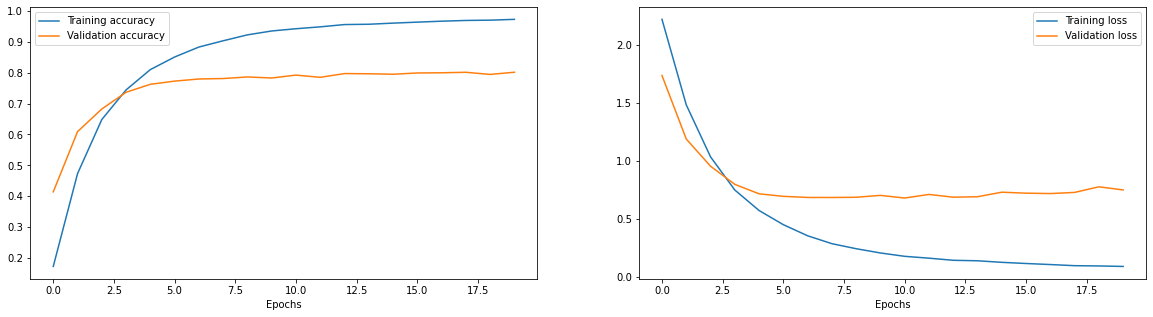

In [9]:
plot_training_history(history)

Use some 'unseen' test samples

In [10]:
for_training=False

testing_set_generator = get_captcha_generator(data_frame, 
                                              test_indices, 
                                              for_training, 
                                              TESTING_BATCH_SIZE,
                                              IMAGE_HEIGHT,
                                              IMAGE_WIDTH,
                                              CATEGORIES)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, 
                                             steps=len(test_indices)//TESTING_BATCH_SIZE)))

46/46 [==============================] - 7s 149ms/step - loss: 0.7377 - accuracy: 0.7979


{'loss': 0.7377216219902039, 'accuracy': 0.7978515625}

---
## Visualize Model Performance

In [11]:
captcha_images, predictions, true_values = get_prediction_results(model, 
                                                                  data_frame, 
                                                                  test_indices, 
                                                                  TESTING_BATCH_SIZE)

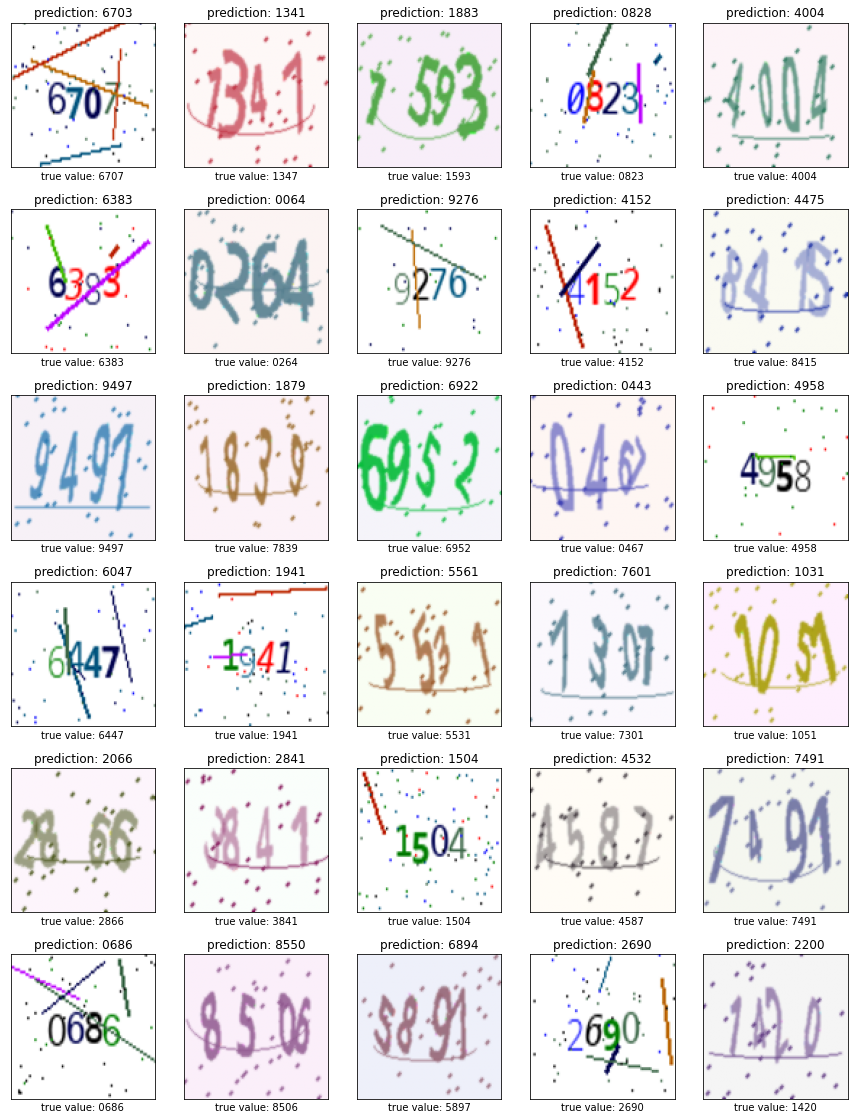

In [12]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)

## Save the Model

In [13]:
#model.save('my_model')